<a href="https://colab.research.google.com/github/Amangaud1205/Abalone_Age_Prediction/blob/main/ABALONE_AGE_PREDICTION_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving abalone (1).csv to abalone (1).csv


In [ ]:
# loading the data from csv file to Pandas DataFrame
abalone = pd.read_csv("abalone (1).csv")

In [ ]:
abalone.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
abalone.shape

(4177, 9)

In [ ]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.duplicated().sum()

0

Statistical summary of features

In [ ]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
corr = abalone.corr()

<ipython-input-96-993f8f978eab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abalone.corr()


<Axes: >

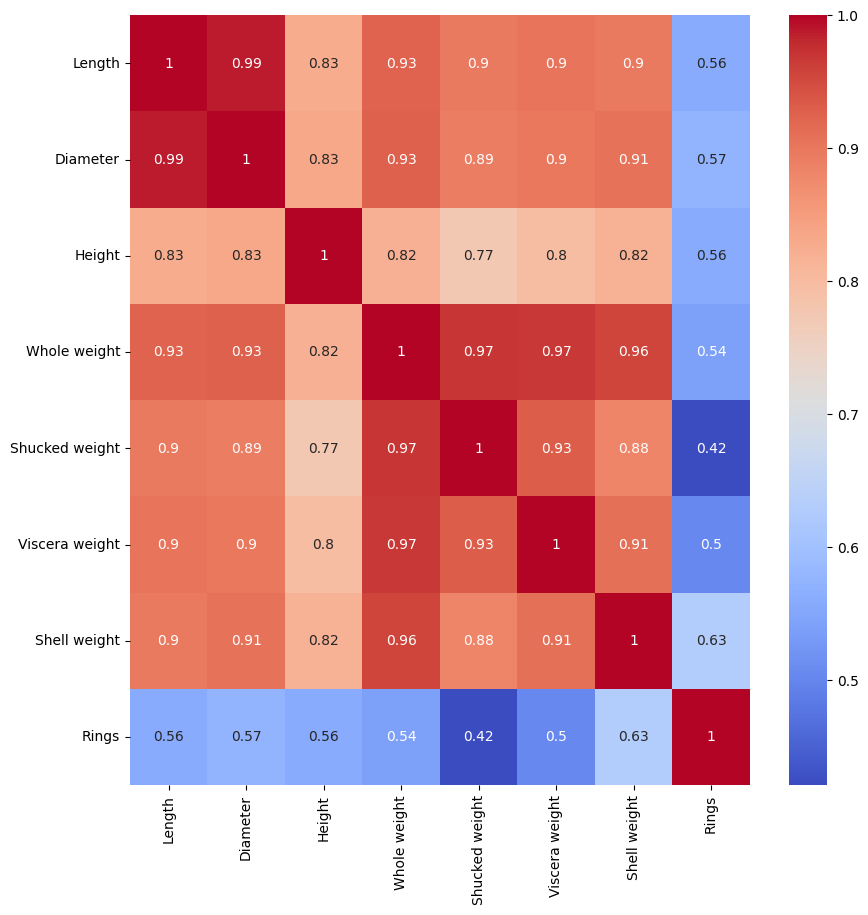

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

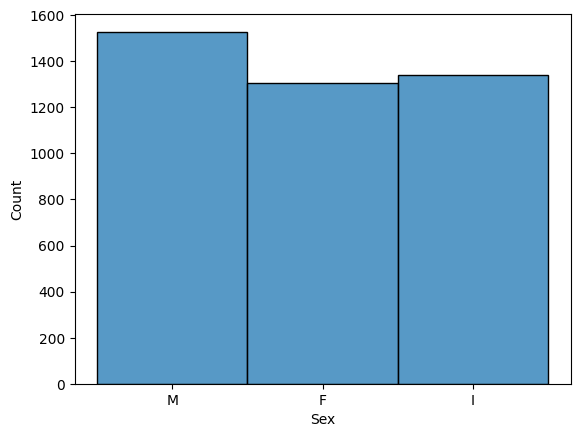

In [ ]:
sns.histplot(abalone['Sex'])

In [ ]:
abalone['Sex'] = abalone['Sex'].map({"M":0, "F":1, "I":2})

In [ ]:
abalone['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Abalone Age Rings distribution')

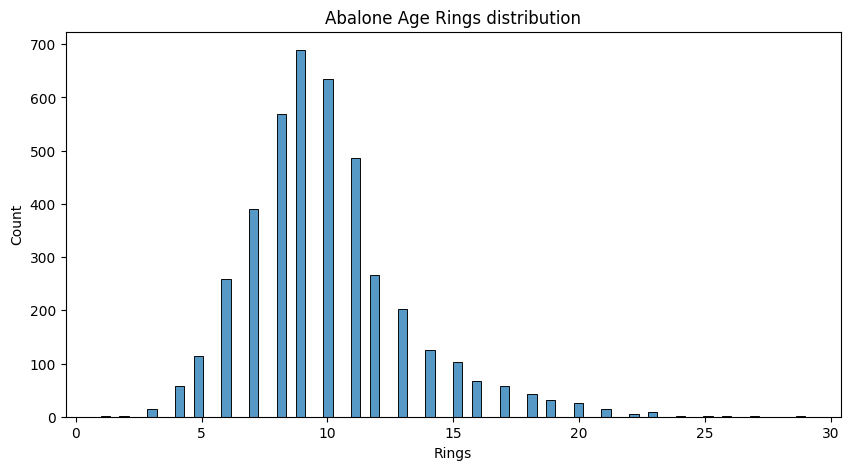

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(abalone['Rings'])
plt.title("Abalone Age Rings distribution")

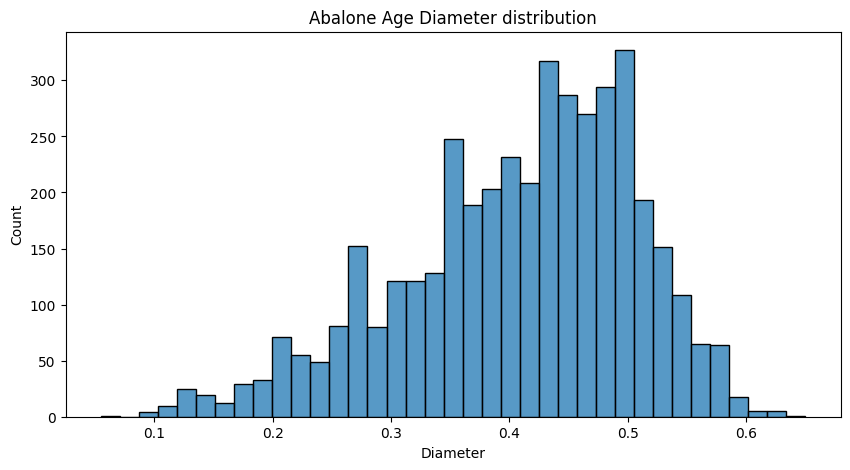

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(abalone['Diameter'])
plt.title("Abalone Age Diameter distribution")
plt.show()

<Figure size 1000x500 with 0 Axes>

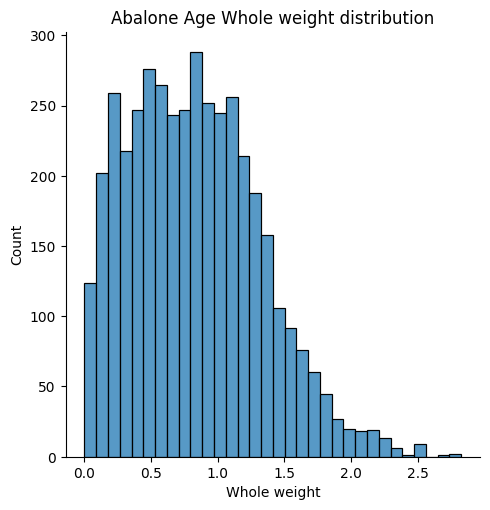

In [ ]:
plt.figure(figsize=(10, 5))
sns.displot(abalone['Whole weight'])
plt.title("Abalone Age Whole weight distribution")
plt.show()

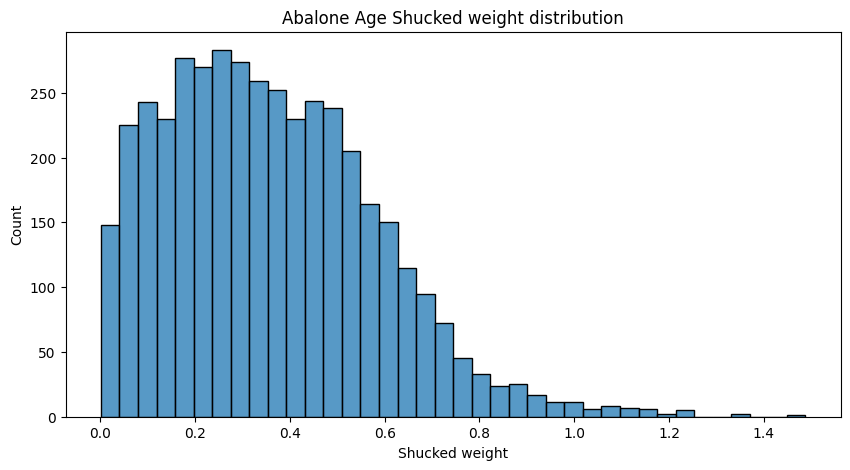

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(abalone['Shucked weight'])
plt.title("Abalone Age Shucked weight distribution")
plt.show()

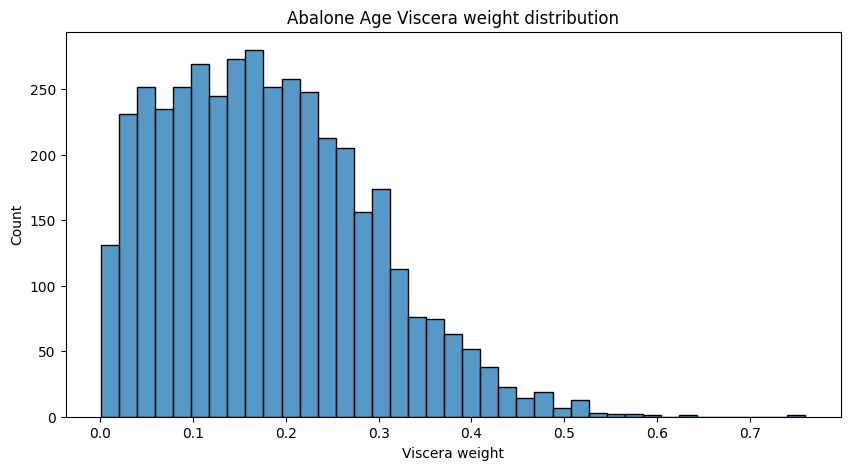

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(abalone['Viscera weight'])
plt.title("Abalone Age Viscera weight distribution")
plt.show()

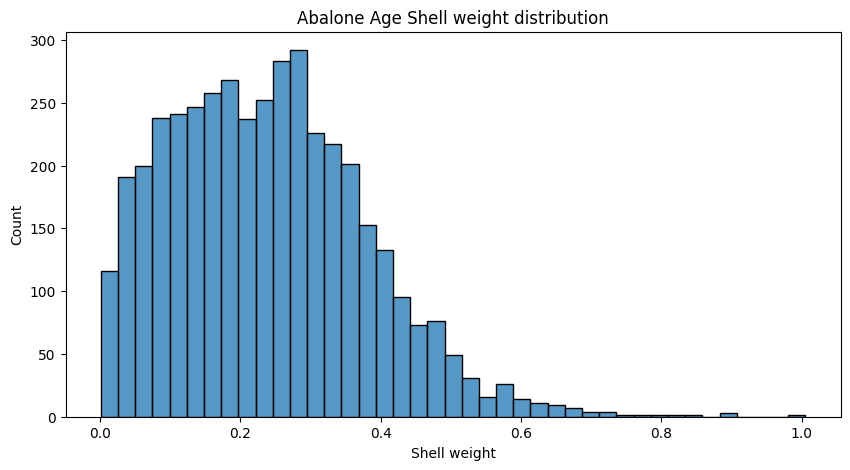

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(abalone['Shell weight'])
plt.title("Abalone Age Shell weight distribution")
plt.show()

<Axes: xlabel='Length', ylabel='Rings'>

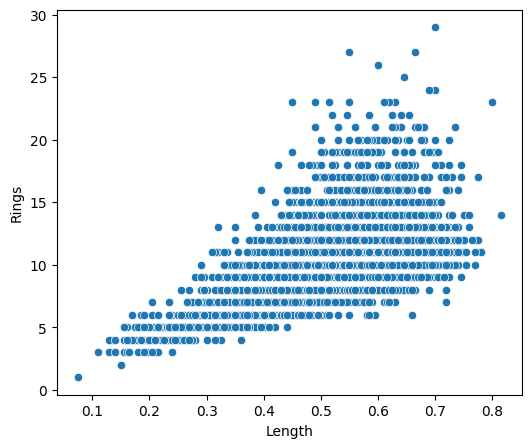

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x ='Length', y ='Rings', data=abalone)

<Figure size 500x500 with 0 Axes>

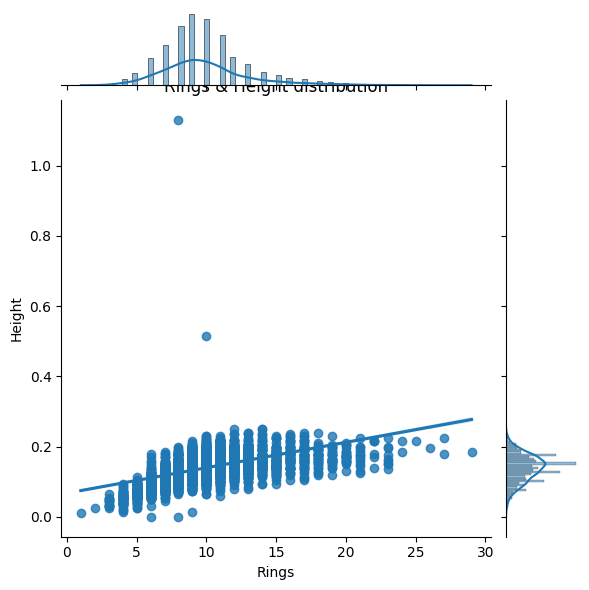

<Figure size 1500x500 with 0 Axes>

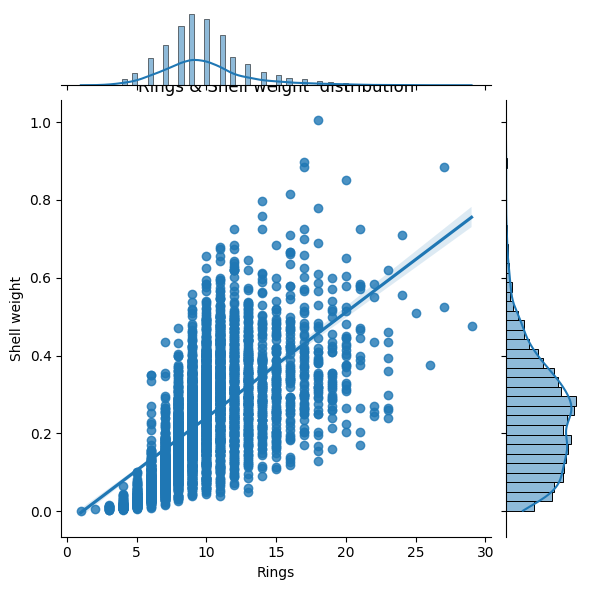

In [ ]:
plt.figure(figsize=(5, 5))
sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg');
plt.title("Rings & Height distribution")
plt.show()


plt.figure(figsize=(15, 5))
sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg');
plt.title("Rings & Shell weight  distribution")
plt.show()

Train test split

In [ ]:
x = abalone.drop('Rings', axis = 1)
y = abalone['Rings']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.02, random_state=0)

In [ ]:
x_train.shape,x_test.shape

((4093, 8), (84, 8))

In [ ]:
x_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
4039,2,0.560,0.440,0.155,0.8110,0.3685,0.1780,0.2350
1095,2,0.475,0.350,0.110,0.4565,0.2060,0.0990,0.1300
3422,0,0.610,0.470,0.155,1.0325,0.4970,0.2175,0.2785
2954,0,0.645,0.495,0.190,1.5390,0.6115,0.4080,0.4450
465,2,0.175,0.125,0.050,0.0235,0.0080,0.0035,0.0080
...,...,...,...,...,...,...,...,...
1033,0,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,1,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,1,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [ ]:
scalr = StandardScaler()

In [ ]:
x_train.scal = scalr.fit_transform(x_train)
x_train.scal

array([[ 1.26210532,  0.29719899,  0.32092632, ...,  0.03788678,
        -0.02620504, -0.03005575],
       [ 1.26210532, -0.41148514, -0.58705854, ..., -0.6938331 ,
        -0.74666428, -0.78562938],
       [-1.156339  ,  0.714072  ,  0.62358794, ...,  0.61650834,
         0.33402458,  0.28296761],
       ...,
       [-1.156339  ,  0.5890101 ,  0.42181353, ...,  0.46341003,
         0.23370747,  0.10306913],
       [ 0.05288316,  0.83913391,  0.82536235, ...,  0.52645051,
         0.50729959,  0.57080518],
       [ 1.26210532, -0.95342006, -0.83927655, ..., -1.02479563,
        -0.96553797, -0.99431162]])

In [ ]:
x_test.scal = scalr.fit_transform(x_test)
x_test.scal

<ipython-input-78-5768a6f2612e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_test.scal = scalr.fit_transform(x_test)


array([[-1.06341014e+00,  3.48045687e-01,  3.11410607e-01,
         4.95940820e-01,  3.28784697e-01, -2.21085919e-01,
         7.16095172e-01,  7.61184882e-01],
       [ 1.25675744e+00, -5.08061235e-02,  6.92023571e-02,
        -3.54243443e-01, -2.81326765e-01, -2.98947711e-01,
        -2.25619027e-01, -1.91779465e-01],
       [-1.06341014e+00,  9.06438222e-01,  8.44268756e-01,
         4.95940820e-01,  1.01275708e+00,  9.56278758e-01,
         1.94974077e+00,  6.43327100e-01],
       [ 1.25675744e+00, -2.28437626e+00, -2.20755519e+00,
        -1.93315708e+00, -1.41757083e+00, -1.42912342e+00,
        -1.45926463e+00, -1.36025518e+00],
       [-1.06341014e+00,  1.10586413e+00,  1.03803536e+00,
         9.81760400e-01,  1.52877175e+00,  1.64759709e+00,
         1.96386648e+00,  1.04741092e+00],
       [ 9.66736489e-02,  1.14574931e+00,  1.08647701e+00,
         7.38850610e-01,  8.19504529e-01,  7.27412278e-01,
         1.00802657e+00,  8.55471107e-01],
       [-1.06341014e+00, -3.300023

In [ ]:
# Define a list of models to train and compare
models = [

    ('lg', LinearRegression()),

    ('ridge', Ridge()),

    ('Lass', Lasso()),

    ('dtr', DecisionTreeRegressor(random_state=42)),

    ('rfr', RandomForestRegressor(random_state=42))

]

In [ ]:
for name, model in models:

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)

    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

lg: MSE = 3.77, R2 = 0.64
ridge: MSE = 3.90, R2 = 0.63
Lass: MSE = 10.53, R2 = -0.01
dtr: MSE = 5.88, R2 = 0.44
rfr: MSE = 3.30, R2 = 0.68


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

5.238095238095238
0.4976076555023924
